<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

### Carga de datos

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,AveragePooling2D

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


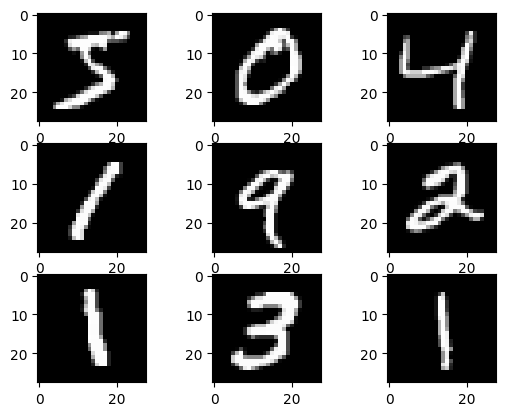

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [3]:
trainX.shape

(60000, 28, 28)

In [9]:
trainX[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 196,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 139,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 253,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        198, 253, 254, 253, 114,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 253, 254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28,  83, 196,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [5]:
trainy.shape

(60000,)

In [10]:
trainy[200]

1

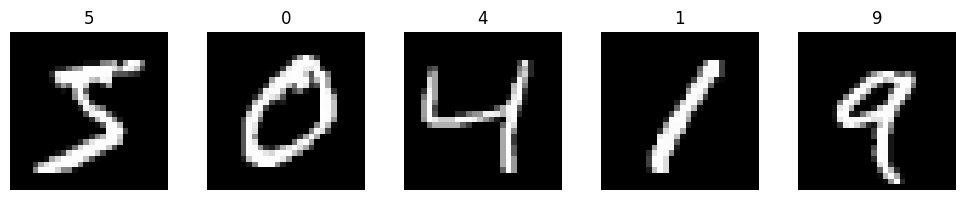

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
  axs[i].imshow(trainX[i], cmap='gray')
  axs[i].set_title(trainy[i])
  axs[i].axis('off')

plt.tight_layout()
plt.show()

### Preprocesamiento

In [12]:
x2_train = tf.pad(trainX, [[0, 0], [2,2], [2,2]])/255 # padding 2 pixels to each side
x2_test = tf.pad(testX, [[0, 0], [2,2], [2,2]])/255
x2_train.shape

TensorShape([60000, 32, 32])

In [13]:
x2_train=tf.expand_dims(x2_train,axis=3,name=None)
x2_test=tf.expand_dims(x2_test,axis=3,name=None)
print(x2_train.shape, trainy.shape, x2_test.shape, testy.shape)

(60000, 32, 32, 1) (60000,) (10000, 32, 32, 1) (10000,)


In [20]:
def leNet(X_train,activation='relu'):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation=activation, input_shape=X_train.shape[1:]))
    model.add(AveragePooling2D(pool_size=2))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation=activation))
    model.add(AveragePooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(120, activation=activation))
    model.add(Dense(84, activation=activation))
    model.add(Dense(10, activation='softmax'))
    return model

In [21]:
model = leNet(x2_train)

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history=model.fit(x2_train, trainy, epochs=20, batch_size=128, validation_data=(x2_test, testy))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.7809 - loss: 0.7376 - val_accuracy: 0.9678 - val_loss: 0.1066
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9692 - loss: 0.1025 - val_accuracy: 0.9798 - val_loss: 0.0625
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9786 - loss: 0.0715 - val_accuracy: 0.9863 - val_loss: 0.0442
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9827 - loss: 0.0573 - val_accuracy: 0.9848 - val_loss: 0.0446
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9860 - loss: 0.0455 - val_accuracy: 0.9886 - val_loss: 0.0385
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9889 - val_loss: 0.0340
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9876 - val_loss: 0.0407
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9899 - loss: 0.0323 - 

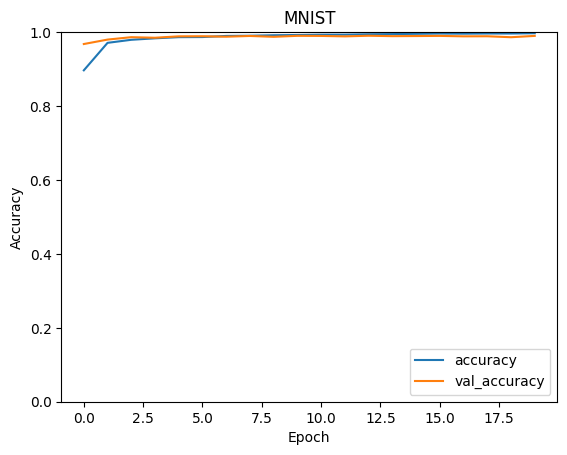

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


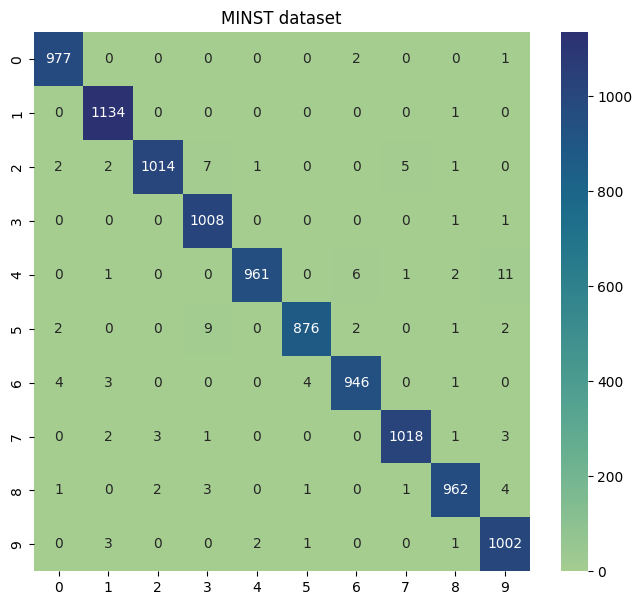

In [26]:
import seaborn as sns
predy=model.predict(x2_test)
predy=np.argmax(predy,axis=1)
confusion_matrix=tf.math.confusion_matrix(testy,predy)
plt.figure(figsize=(8, 7))
plt.title('MINST dataset')
sns.heatmap(confusion_matrix, cmap="crest", annot=True, fmt='g')
plt.show()